# Απάντηση Ε3-assignment1

### Ε3: Εξέλιξη Ημερήσιων Θερμοκρασιών


In [1]:
# ! pip3 install pandas

In [2]:
# Φόρτωση δεδομένων απο NOAA
import pandas as pd
weather_df=pd.read_csv('noaa_hellinikon_1995_2020.csv')

In [3]:
weather_df.dropna(axis=0, how='any', inplace=True)

In [4]:
# Αρχικά θα βρούμε την μέση θερμοκρασία κάθε ημέρας για κάθε έτος στην περίοδο από το 1955 έως το 2020, η οποία υπάρχει ήδη.
# Θα μετατρέψουμε την στήλη "DATE" σε datatime για καλύτερη διαχείρηση των δεδομένων μας
weather_df['DATE']=weather_df['DATE'].apply(pd.to_datetime)

In [5]:
weather_TAVG_1974_1999=weather_df.query('DATE>="1974-01-01" and DATE<="1999-12-31"')[['DATE','TAVG']]
weather_TAVG_1974_1999=weather_TAVG_1974_1999.assign(MONTH=pd.DatetimeIndex(weather_TAVG_1974_1999['DATE']).month)
weather_TAVG_1974_1999=weather_TAVG_1974_1999.assign(DAY=pd.DatetimeIndex(weather_TAVG_1974_1999['DATE']).day) # προσθέτω μήνα ,μέρα στα δεδομένα μου

In [6]:
weather_TAVG_1974_1999=weather_TAVG_1974_1999.iloc[:,1:]
weather_TAVG_1974_1999

,TAVG,MONTH,DAY
6940,11.6,1,1
6941,13.7,1,2
6942,12.2,1,3
6943,10.8,1,4
6944,9.6,1,5
...,...,...,...
16431,15.4,12,27
16432,16.9,12,28
16433,15.1,12,29
16434,13.4,12,30


In [7]:
# εξομαλύνουμε με ένα κυλιόμενο παράθυρο 30 ημερών
weather_TAVG_1974_1999_rolling=weather_TAVG_1974_1999.set_index(['MONTH','DAY']).TAVG.rolling(window=30).mean().to_frame('rolling_TAVG')
weather_TAVG_1974_1999_rolling.reset_index(inplace=True)

In [8]:
weather_TAVG_1974_1999_rolling=weather_TAVG_1974_1999_rolling[['MONTH','rolling_TAVG']]
weather_TAVG_1974_1999_rolling  

,MONTH,rolling_TAVG
0,1,NaN
1,1,NaN
2,1,NaN
3,1,NaN
4,1,NaN
...,...,...
9482,12,13.303333
9483,12,13.540000
9484,12,13.680000
9485,12,13.753333


In [9]:
month_name = {1:'Jan',2:'Feb',3:'Marh',4:'Apl',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'}
weather_TAVG_1974_1999_rolling.MONTH.replace(month_name, inplace=True) # replace με γράμματα τους μήνες

In [10]:
weather_TAVG_1974_1999_rolling.dropna(axis=0, how='any', inplace=True)  # καθαρισμός απο null τιμές

In [11]:
weather_TAVG_1955_2020=weather_df[['DATE','TAVG']]
weather_TAVG_1955_2020    # μέση θερμοκρασία κάθε ημέρας για κάθε έτος στην περίοδο από το 1955 έως το 2020

,DATE,TAVG
912,1957-07-01,22.4
913,1957-07-02,26.1
914,1957-07-03,25.4
915,1957-07-04,26.5
916,1957-07-05,28.6
...,...,...
23246,2020-12-27,16.6
23247,2020-12-28,14.8
23248,2020-12-29,16.3
23249,2020-12-30,16.4


In [12]:
weather_TAVG_1955_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20940 entries, 912 to 23250
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    20940 non-null  datetime64[ns]
 1   TAVG    20940 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 490.8 KB


In [13]:
weather_TAVG_1955_2020.set_index('DATE',inplace=True)

In [14]:
weather_TAVG_1955_2020_rolling=weather_TAVG_1955_2020.TAVG.rolling(window=30).mean().to_frame('rolling_TAVG').reset_index()
weather_TAVG_1955_2020_rolling  # Έχουν εξομαλυνθεί παίρνοντας ένα κυλιομένο παράθυρο 30 ημερών (30 days rolling average)

,DATE,rolling_TAVG
0,1957-07-01,NaN
1,1957-07-02,NaN
2,1957-07-03,NaN
3,1957-07-04,NaN
4,1957-07-05,NaN
...,...,...
20935,2020-12-27,14.086667
20936,2020-12-28,14.153333
20937,2020-12-29,14.153333
20938,2020-12-30,14.193333


In [15]:
weather_TAVG_1955_2020_rolling.isnull().sum()

DATE             0
rolling_TAVG    29
dtype: int64

In [16]:
weather_TAVG_1955_2020_rolling=weather_TAVG_1955_2020_rolling.assign(YEAR=pd.DatetimeIndex(weather_TAVG_1955_2020_rolling['DATE']).year)
weather_TAVG_1955_2020_rolling=weather_TAVG_1955_2020_rolling.assign(MONTH=pd.DatetimeIndex(weather_TAVG_1955_2020_rolling['DATE']).month)
# weather_TAVG_1955_2020_rolling=weather_TAVG_1955_2020_rolling.assign(DAY=pd.DatetimeIndex(weather_TAVG_1955_2020_rolling['DATE']).day)
weather_TAVG_1955_2020_rolling=weather_TAVG_1955_2020_rolling.iloc[:,1:] # Νέες κολώνες "YEAR" και "ΜΟΝΤΗ" που θα μας βοηθήσουν στην διαχείριση των δεδομένων
weather_TAVG_1955_2020_rolling

,rolling_TAVG,YEAR,MONTH
0,NaN,1957,7
1,NaN,1957,7
2,NaN,1957,7
3,NaN,1957,7
4,NaN,1957,7
...,...,...,...
20935,14.086667,2020,12
20936,14.153333,2020,12
20937,14.153333,2020,12
20938,14.193333,2020,12


In [17]:
weather_TAVG_1955_2020_rolling.isnull().sum() # έλεγχος null τιμών

rolling_TAVG    29
YEAR             0
MONTH            0
dtype: int64

In [18]:
weather_TAVG_1955_2020_rolling.sort_values(by='MONTH', ascending=True, inplace=True) # κάνουμε sort τους μήνες

In [19]:
# replace με γράμματα τους μήνες
# month_name = {1:'Jan',2:'Feb',3:'Marh',4:'Apl',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'}
weather_TAVG_1955_2020_rolling.MONTH.replace(month_name, inplace=True)

In [20]:
# Μετατροπή των δεδομένων σε pivot table , επειδή θα μας βοηθήσει με το γράφημα
order = weather_TAVG_1955_2020_rolling['MONTH']
weather_TAVG_1955_2020_rolling_pivot = weather_TAVG_1955_2020_rolling.pivot_table(index='MONTH', columns='YEAR', values='rolling_TAVG', dropna=True)
weather_TAVG_1955_2020_rolling_pivot = weather_TAVG_1955_2020_rolling_pivot.reindex(order, axis=0)
weather_TAVG_1955_2020_rolling_pivot


YEAR,1957,1958,1961,1962,1963,1964,1965,1966,1967,1968,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
MONTH,,,,,,,,,,,,,,,,,,,,,
Jan,NaN,11.505914,12.670645,11.820323,12.573226,10.433978,11.800108,12.232688,11.174301,11.308495,...,12.008817,10.372581,NaN,NaN,10.218710,11.243548,8.090000,11.551290,9.241720,10.144624
Jan,NaN,11.505914,12.670645,11.820323,12.573226,10.433978,11.800108,12.232688,11.174301,11.308495,...,12.008817,10.372581,NaN,NaN,10.218710,11.243548,8.090000,11.551290,9.241720,10.144624
Jan,NaN,11.505914,12.670645,11.820323,12.573226,10.433978,11.800108,12.232688,11.174301,11.308495,...,12.008817,10.372581,NaN,NaN,10.218710,11.243548,8.090000,11.551290,9.241720,10.144624
Jan,NaN,11.505914,12.670645,11.820323,12.573226,10.433978,11.800108,12.232688,11.174301,11.308495,...,12.008817,10.372581,NaN,NaN,10.218710,11.243548,8.090000,11.551290,9.241720,10.144624
Jan,NaN,11.505914,12.670645,11.820323,12.573226,10.433978,11.800108,12.232688,11.174301,11.308495,...,12.008817,10.372581,NaN,NaN,10.218710,11.243548,8.090000,11.551290,9.241720,10.144624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Dec,11.850645,13.123548,14.765699,14.123763,15.083871,14.206022,14.935591,15.368495,15.135139,12.258172,...,12.923011,24.930000,NaN,14.743656,14.352151,12.134516,14.045591,12.838387,15.273656,14.335054
Dec,11.850645,13.123548,14.765699,14.123763,15.083871,14.206022,14.935591,15.368495,15.135139,12.258172,...,12.923011,24.930000,NaN,14.743656,14.352151,12.134516,14.045591,12.838387,15.273656,14.335054
Dec,11.850645,13.123548,14.765699,14.123763,15.083871,14.206022,14.935591,15.368495,15.135139,12.258172,...,12.923011,24.930000,NaN,14.743656,14.352151,12.134516,14.045591,12.838387,15.273656,14.335054


In [21]:
weather_TAVG_1955_2020_rolling_pivot.dropna(axis=1,how='any', inplace=True) # κάνουμε drop τις κολώνες πού έχουν ΄έστω και μια null τιμή

In [22]:
weather_TAVG_1955_2020_rolling_pivot.shape[1] # αριθμός των κολωνών μετα το dropna

56

In [30]:
# ! pip3 install matplotlib
# ! pip3 install seaborn

In [31]:
# To γράφημα 

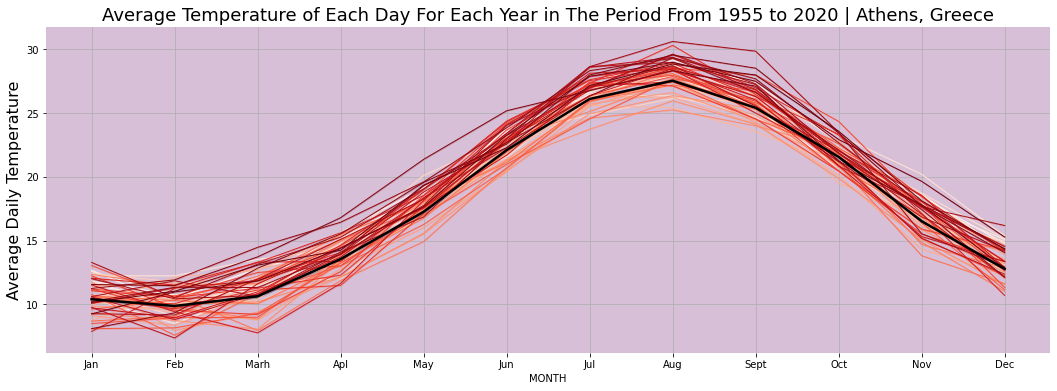

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

fig=plt.figure(figsize=(18,6))
axes=plt.axes()

palette = sns.color_palette('Reds', n_colors=weather_TAVG_1955_2020_rolling_pivot.shape[1])


sns.lineplot(data=weather_TAVG_1955_2020_rolling_pivot,linewidth=1.0, palette=palette, dashes=False)

sns.lineplot(x=weather_TAVG_1974_1999_rolling.MONTH.values,y=weather_TAVG_1974_1999_rolling.rolling_TAVG.values,color='k', linewidth=2.5, dashes=False)



axes.set_facecolor('thistle')
plt.grid('w')
axes.get_legend().remove()
axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)
axes.spines['bottom'].set_visible(False)
axes.spines['left'].set_visible(False)
plt.ylabel('Average Daily Temperature',fontsize=16)
plt.title('Average Temperature of Each Day For Each Year in The Period From 1955 to 2020 | Athens, Greece',fontsize=18)
plt.show()

---
* Ερμηνεία
---

In [33]:
# Το γράφημα μας δείχνει την πορεία των θερμοκρασιών σε όλα τα έτη. Όσον αφορά την θερμοκρασία ανά μήνα είναι κάτι το οποίο αναμέναμε. Οι ανοιχτές αποχρώσεις προδίδουν τα 
# χρόνια με χαμηλότερες μέσες θερμοκρασίες , ένω οι πιο σκουρόχρωμες σχετίζονται με τα έτη που είχαν μεγαλύτερες μέσες θερμοκρασίες.
# Τέλος η μαύρη γραμμή που είναι ο κινητός μέσος θερμοκρασίων ανα 30 ημέρες, μας δείχνει ότι με την πάροδο του χρόνου οι μέσες θερμοκρσίες,
# γίνονται όλο και μεγαλύτερες. Δίοτι όλο και πιο σκουρόχρωμες γραμμές είναι πάνω απο την μαύρη γραμμή.